In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
clicks = pd.read_csv('stud_dates_click.csv')
clicks

,code_module,code_presentation,id_student,final_result,-25,-24,-23,-22,-21,-20,...,260,261,262,263,264,265,266,267,268,269
0,AAA,2013J,11391,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AAA,2013J,28400,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AAA,2013J,30268,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AAA,2013J,31604,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,AAA,2013J,32885,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,Fail,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32589,GGG,2014J,2645731,Distinction,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32590,GGG,2014J,2648187,Pass,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32591,GGG,2014J,2679821,Withdrawn,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
stud_df = pd.read_csv('./data/studentInfo.csv')
stud_df

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...
32588,GGG,2014J,2640965,F,Wales,Lower Than A Level,10-20,0-35,0,30,N,Fail
32589,GGG,2014J,2645731,F,East Anglian Region,Lower Than A Level,40-50%,35-55,0,30,N,Distinction
32590,GGG,2014J,2648187,F,South Region,A Level or Equivalent,20-30%,0-35,0,30,Y,Pass
32591,GGG,2014J,2679821,F,South East Region,Lower Than A Level,90-100%,35-55,0,30,N,Withdrawn


In [4]:
score_df = pd.read_csv('stud_graded_nonGraded_assessment.csv')
score_df

,code_module,code_presentation,id_student,id_assessment,date,weight,date_submitted,is_banked,score,marks
0,AAA,2013J,11391,1752,19.0,10.0,18,0,78.0,7.8
1,AAA,2013J,11391,1753,54.0,20.0,53,0,85.0,17.0
2,AAA,2013J,11391,1754,117.0,20.0,115,0,80.0,16.0
3,AAA,2013J,11391,1755,166.0,20.0,164,0,85.0,17.0
4,AAA,2013J,11391,1756,215.0,30.0,212,0,82.0,24.6
...,...,...,...,...,...,...,...,...,...,...
173907,GGG,2014J,2684003,37437,173.0,0.0,169,0,60.0,60.0
173908,GGG,2014J,2684003,37438,229.0,0.0,73,0,100.0,100.0
173909,GGG,2014J,2684003,37439,229.0,0.0,150,0,60.0,60.0
173910,GGG,2014J,2684003,37440,229.0,0.0,172,0,100.0,100.0


In [5]:
# data = pd.merge(stud_df, data, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')

In [6]:
# cols = [str(i) for i in range(-25, 270)]
# data.groupby('final_result')[cols].mean().T.plot(figsize=(14, 10))

# Remove those student records who has no records on studnet VLE

We want to predict the final result of each student based on the interaction with VLE, therefore it better to keep
those students records who has atleast some interaction with VLE
<br><br>

In [7]:
# data[data[cols].sum(axis=1)==0]

In [8]:
# data[data[cols].sum(axis=1)==0]['final_result'].value_counts()

<br>

## It seems 3365 students has no records on studentVLE table

From above analysis we see that out of 3365 students, 2988 students Withdrawn, 374 students are Fail and 3 students are Pass.

* Withdrawn: In case of withdrawn, It is possible that student register for the course and after some time period student withdrawn from couse without interacting with VLE.  
* Fail: In case of Fail, Maybe student register for the course but did not withdrawn till the end of course that why they may have Fail status
* Pass: This is exceptional condition, without any interaction with VLE, how studnet get pass, 

These records will affect the model, therefore We will drop these records for further processing
<br><br>

In [9]:
# data = data[data[cols].sum(axis=1)!=0]
# data

In [10]:
# data.groupby('final_result')[cols].mean().T.plot(figsize=(14, 10))
# plt.xlabel('Dates')
# plt.ylabel('Average click')

<br>
If we compare the two graphs, we can see that the graph of withdraw and Fail is almost identical till 25 days.  After 25 to 75 dyas, the difference is noticable but after 75 days, the gap becomes bigger. 
<br>

In [11]:
# data['final_result'] = data['final_result'].map({'Pass':1, 'Distinction':2, 'Withdrawn':0, 'Fail':0})

In [12]:
days=150
query = 'date<{} and weight!=0'.format(days)
weighted = score_df.query(query)
weighted = weighted.groupby(['code_module', 'code_presentation', 'id_student'])['marks'].sum()
# average the weighted grade
query = 'date<{} and weight==0'.format(days)
non_weighted = score_df.query(query)
non_weighted = non_weighted.groupby(['code_module', 'code_presentation', 'id_student'])['marks'].mean()
# make one table
score_df = pd.merge(weighted, non_weighted, on=['code_module', 'code_presentation', 'id_student'], how='outer')
score_df.columns = ['graded', 'non_graded']
score_df.fillna(0, inplace=True)
# merge score df and clicks df
final = pd.merge(clicks, score_df, on=['code_module', 'code_presentation', 'id_student'], how='left')
final.fillna(0, inplace=True)
final = pd.merge(stud_df, final, on=['code_module', 'code_presentation', 'id_student', 'final_result'], how='inner')
final['final_result'] = final['final_result'].map({'Pass':1, 'Distinction':2, 'Withdrawn':0, 'Fail':0})

# train_test_split
dataX = final.drop(columns='final_result')
target = final['final_result']
X_train, X_test, y_train, y_test = train_test_split(dataX, target, test_size=0.2, stratify=target)

In [13]:
def prepare_data(data, days):
    #clicks data
    cols = [str(i) for i in range(-25, days)]
    X1 = data[cols]
    
    # demographic data
    gen_cols = ['gender', 'region', 'highest_education', 'imd_band', 
        'age_band', 'num_of_prev_attempts', 'studied_credits', 'disability']
    cat_cols = ['gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability']
    X2 = data[gen_cols]
    for col in cat_cols:
        X2 = pd.concat([X2, pd.get_dummies(X2[col], prefix=col, prefix_sep='_')], axis=1)
        X2.drop(columns=col, inplace=True)
    
    # assignmnet score data
    score_cols = ['code_module', 'code_presentation', 'graded', 'non_graded']
    X3 = data[score_cols]
    for col in score_cols[:2]:
        X3 = pd.concat([X3, pd.get_dummies(X3[col], prefix=col, prefix_sep='_')], axis=1)
        X3.drop(columns=col, inplace=True)        
    
    return X1, X2, X3

In [14]:
X_train_clicks, X_train_demographics, X_train_score = prepare_data(X_train, days)
X_test_clicks, X_test_demographics, X_test_score = prepare_data(X_test, days)
print('Train Data:', X_train_clicks.shape, X_train_demographics.shape, X_train_score.shape)
print('Test Data: ', X_test_clicks.shape, X_test_demographics.shape, X_test_score.shape)

Train Data: (26074, 175) (26074, 37) (26074, 13)
Test Data:  (6519, 175) (6519, 37) (6519, 13)


In [15]:
from tensorflow.keras import utils
y_train_cat = utils.to_categorical(y_train)
y_test_cat = utils.to_categorical(y_test)

In [16]:
from tensorflow.keras.layers import Dense, Input, Conv1D, AveragePooling1D, Flatten, Add, Multiply, Softmax
from tensorflow.keras import Sequential, Model

In [17]:
model = Sequential()
model.add(Input(shape=(days+25, )))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(3, activation='softmax'))

demographic = Sequential()
demographic.add(Input(shape=(37, )))
demographic.add(Dense(128, activation='relu'))
demographic.add(Dense(64, activation='relu'))
demographic.add(Dense(16, activation='relu'))
demographic.add(Dense(3, activation='softmax'))

assignmnet = Sequential()
assignmnet.add(Input(shape=(13, )))
assignmnet.add(Dense(128, activation='relu'))
assignmnet.add(Dense(64, activation='relu'))
assignmnet.add(Dense(16, activation='relu'))
assignmnet.add(Dense(3, activation='softmax'))

In [18]:
# model.summary()

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
demographic.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
assignmnet.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# categorical_crossentropy, binary_crossentropy

In [1]:
def visualize_loss(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.legend(['Train', 'Validation'])
    plt.show()

In [20]:
history = model.fit(X_train_clicks, y_train_cat, epochs=20, batch_size=10, verbose=2)
predict = model.predict(X_test_clicks)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

Epoch 1/20
2608/2608 - 11s - loss: 0.7643 - accuracy: 0.6997
Epoch 2/20
2608/2608 - 13s - loss: 0.6122 - accuracy: 0.7528
Epoch 3/20
2608/2608 - 13s - loss: 0.5788 - accuracy: 0.7590
Epoch 4/20
2608/2608 - 9s - loss: 0.5594 - accuracy: 0.7660
Epoch 5/20
2608/2608 - 14s - loss: 0.5464 - accuracy: 0.7692
Epoch 6/20
2608/2608 - 13s - loss: 0.5186 - accuracy: 0.7739
Epoch 7/20
2608/2608 - 22s - loss: 0.5000 - accuracy: 0.7795
Epoch 8/20
2608/2608 - 12s - loss: 0.4752 - accuracy: 0.7845
Epoch 9/20
2608/2608 - 25s - loss: 0.4570 - accuracy: 0.7914
Epoch 10/20
2608/2608 - 8s - loss: 0.4359 - accuracy: 0.7973
Epoch 11/20
2608/2608 - 6s - loss: 0.4297 - accuracy: 0.8023
Epoch 12/20
2608/2608 - 3s - loss: 0.4119 - accuracy: 0.8159
Epoch 13/20
2608/2608 - 7s - loss: 0.4029 - accuracy: 0.8215
Epoch 14/20
2608/2608 - 4s - loss: 0.3891 - accuracy: 0.8251
Epoch 15/20
2608/2608 - 4s - loss: 0.3792 - accuracy: 0.8321
Epoch 16/20
2608/2608 - 4s - loss: 0.3694 - accuracy: 0.8385
Epoch 17/20
2608/2608 - 3

In [21]:
history = demographic.fit(X_train_demographics, y_train_cat, epochs=20, batch_size=10, verbose=2)
predict = demographic.predict(X_test_demographics)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

Epoch 1/20
2608/2608 - 6s - loss: 0.9303 - accuracy: 0.5258
Epoch 2/20
2608/2608 - 5s - loss: 0.8978 - accuracy: 0.5458
Epoch 3/20
2608/2608 - 6s - loss: 0.8923 - accuracy: 0.5528
Epoch 4/20
2608/2608 - 5s - loss: 0.8908 - accuracy: 0.5502
Epoch 5/20
2608/2608 - 6s - loss: 0.8894 - accuracy: 0.5529
Epoch 6/20
2608/2608 - 14s - loss: 0.8886 - accuracy: 0.5524
Epoch 7/20
2608/2608 - 7s - loss: 0.8877 - accuracy: 0.5541
Epoch 8/20
2608/2608 - 6s - loss: 0.8881 - accuracy: 0.5550
Epoch 9/20
2608/2608 - 6s - loss: 0.8872 - accuracy: 0.5573
Epoch 10/20
2608/2608 - 7s - loss: 0.8870 - accuracy: 0.5543
Epoch 11/20
2608/2608 - 9s - loss: 0.8863 - accuracy: 0.5533
Epoch 12/20
2608/2608 - 9s - loss: 0.8858 - accuracy: 0.5531
Epoch 13/20
2608/2608 - 9s - loss: 0.8847 - accuracy: 0.5571
Epoch 14/20
2608/2608 - 9s - loss: 0.8848 - accuracy: 0.5552
Epoch 15/20
2608/2608 - 11s - loss: 0.8846 - accuracy: 0.5542
Epoch 16/20
2608/2608 - 7s - loss: 0.8844 - accuracy: 0.5527
Epoch 17/20
2608/2608 - 6s - lo

/home/ramesh/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [224]:
history = assignmnet.fit(X_train_score, y_train_cat, validation_split=0.1, epochs=15, batch_size=32, verbose=2)
predict = assignmnet.predict(X_test_score)
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

Epoch 1/15
734/734 - 1s - loss: 0.6560 - accuracy: 0.7201 - val_loss: 0.6058 - val_accuracy: 0.7427
Epoch 2/15
734/734 - 1s - loss: 0.5783 - accuracy: 0.7429 - val_loss: 0.5689 - val_accuracy: 0.7446
Epoch 3/15
734/734 - 1s - loss: 0.5715 - accuracy: 0.7456 - val_loss: 0.5872 - val_accuracy: 0.7508
Epoch 4/15
734/734 - 1s - loss: 0.5671 - accuracy: 0.7467 - val_loss: 0.5586 - val_accuracy: 0.7573
Epoch 5/15
734/734 - 1s - loss: 0.5594 - accuracy: 0.7495 - val_loss: 0.5816 - val_accuracy: 0.7396
Epoch 6/15
734/734 - 1s - loss: 0.5615 - accuracy: 0.7505 - val_loss: 0.5549 - val_accuracy: 0.7546
Epoch 7/15
734/734 - 1s - loss: 0.5535 - accuracy: 0.7522 - val_loss: 0.5655 - val_accuracy: 0.7462
Epoch 8/15
734/734 - 1s - loss: 0.5524 - accuracy: 0.7513 - val_loss: 0.5549 - val_accuracy: 0.7523
Epoch 9/15
734/734 - 1s - loss: 0.5504 - accuracy: 0.7534 - val_loss: 0.5569 - val_accuracy: 0.7523
Epoch 10/15
734/734 - 1s - loss: 0.5468 - accuracy: 0.7529 - val_loss: 0.5492 - val_accuracy: 0.7569

In [234]:
# lets combine all three models
input_clik= Input(shape=(days+25, ))
x1 = Dense(128, activation='relu')(input_clik)
x1 = Dense(64, activation='relu')(x1)
x1 = Dense(16, activation='relu')(x1)
out1 = Dense(6, activation='relu')(x1)

# input_demo = Input(shape=(37, ))
# x2 = Dense(128, activation='relu')(input_demo)
# x2 = Dense(64, activation='relu')(x2)
# x2 = Dense(16, activation='relu')(x2)
# out2 = Dense(3, activation='relu')(x2)

input_assig = Input(shape=(13, ))
x3 = Dense(128, activation='relu')(input_assig)
x3 = Dense(64, activation='relu')(x3)
x3 = Dense(16, activation='relu')(x3)
out3 = Dense(6, activation='relu')(x3)

out4 = Add()([out1, out3])
out4 = Dense(3, activation='softmax')(out4)
out = Softmax()(out4)

combine_model = Model(inputs=[input_clik, input_assig], outputs=out)
print(combine_model.summary())
combine_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_67 (InputLayer)           [(None, 125)]        0                                            
__________________________________________________________________________________________________
input_68 (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________________________________________
dense_264 (Dense)               (None, 128)          16128       input_67[0][0]                   
__________________________________________________________________________________________________
dense_268 (Dense)               (None, 128)          1792        input_68[0][0]                   
___________________________________________________________________________________________

In [235]:
combine_model.fit([X_train_clicks, X_train_score], y_train_cat, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
815/815 - 1s - loss: 0.8465 - accuracy: 0.6971
Epoch 2/20
815/815 - 1s - loss: 0.8054 - accuracy: 0.7409
Epoch 3/20
815/815 - 1s - loss: 0.7982 - accuracy: 0.7471
Epoch 4/20
815/815 - 1s - loss: 0.7930 - accuracy: 0.7534
Epoch 5/20
815/815 - 1s - loss: 0.7912 - accuracy: 0.7559
Epoch 6/20
815/815 - 1s - loss: 0.7877 - accuracy: 0.7601
Epoch 7/20
815/815 - 1s - loss: 0.7830 - accuracy: 0.7652
Epoch 8/20
815/815 - 1s - loss: 0.7805 - accuracy: 0.7675
Epoch 9/20
815/815 - 2s - loss: 0.7783 - accuracy: 0.7710
Epoch 10/20
815/815 - 2s - loss: 0.7734 - accuracy: 0.7754
Epoch 11/20
815/815 - 2s - loss: 0.7700 - accuracy: 0.7793
Epoch 12/20
815/815 - 2s - loss: 0.7665 - accuracy: 0.7825
Epoch 13/20
815/815 - 3s - loss: 0.7632 - accuracy: 0.7867
Epoch 14/20
815/815 - 3s - loss: 0.7572 - accuracy: 0.7926
Epoch 15/20
815/815 - 2s - loss: 0.7574 - accuracy: 0.7926
Epoch 16/20
815/815 - 2s - loss: 0.7520 - accuracy: 0.7978
Epoch 17/20
815/815 - 2s - loss: 0.7498 - accuracy: 0.8005
Epoch 

In [231]:
predict = combine_model.predict([X_test_clicks, X_test_score])
predict = np.argmax(predict, axis=1)
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.55      0.50      0.53      3766
           1       0.07      0.21      0.10       829
           2       0.33      0.10      0.16      1924

    accuracy                           0.35      6519
   macro avg       0.32      0.27      0.26      6519
weighted avg       0.42      0.35      0.36      6519



In [137]:
from collections import Counter

In [138]:
Counter(y_test)

Counter({1: 2472, 0: 3442, 2: 605})

# lets try with CNN1D

In [192]:
X_train = np.array(X_train_clicks)
X_test = np.array(X_test_clicks)

# reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [194]:
model2 = Sequential()
model2.add(Input(shape=(days+25, 1)))
model2.add(Conv1D(32, kernel_size=2, activation='relu'))
model2.add(AveragePooling1D(2))
model2.add(Conv1D(64, kernel_size=2, activation='relu'))
model2.add(AveragePooling1D(2))
model2.add(Conv1D(128, kernel_size=2, activation='relu'))
model2.add(AveragePooling1D(2))
model2.add(Flatten())
model2.add(Dense(128,  activation='relu'))
model2.add(Dense(64,  activation='relu'))
model2.add(Dense(32,  activation='relu'))
model2.add(Dense(3,  activation='softmax')) #softmax

In [200]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = model2.fit(X_train, y_train_cat, epochs=20, batch_size=32, verbose=2)

Epoch 1/20
815/815 - 11s - loss: 0.2653 - accuracy: 0.9038
Epoch 2/20
815/815 - 10s - loss: 0.1859 - accuracy: 0.9327
Epoch 3/20
815/815 - 10s - loss: 0.1415 - accuracy: 0.9493
Epoch 4/20
815/815 - 10s - loss: 0.1066 - accuracy: 0.9649
Epoch 5/20
815/815 - 10s - loss: 0.0788 - accuracy: 0.9740
Epoch 6/20
815/815 - 10s - loss: 0.0665 - accuracy: 0.9776
Epoch 7/20
815/815 - 10s - loss: 0.0596 - accuracy: 0.9805
Epoch 8/20
815/815 - 13s - loss: 0.0625 - accuracy: 0.9825
Epoch 9/20
815/815 - 15s - loss: 0.0378 - accuracy: 0.9886
Epoch 10/20
815/815 - 11s - loss: 0.0435 - accuracy: 0.9866
Epoch 11/20
815/815 - 11s - loss: 0.0399 - accuracy: 0.9878
Epoch 12/20
815/815 - 10s - loss: 0.0375 - accuracy: 0.9886
Epoch 13/20
815/815 - 15s - loss: 0.0336 - accuracy: 0.9894
Epoch 14/20
815/815 - 12s - loss: 0.0340 - accuracy: 0.9887
Epoch 15/20
815/815 - 11s - loss: 0.0283 - accuracy: 0.9916
Epoch 16/20
815/815 - 12s - loss: 0.0437 - accuracy: 0.9876
Epoch 17/20
815/815 - 12s - loss: 0.0247 - accura

KeyError: 'val_accuracy'

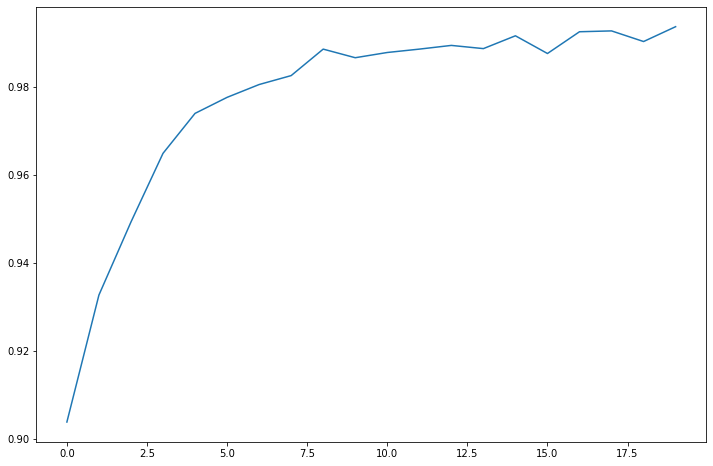

In [201]:
plt.figure(figsize=(12, 8))
plt.plot(hist.history['accuracy'], label='Train')
plt.plot(hist.history['val_accuracy'], label='Validation')
plt.legend()
plt.xlabel('Epoches')
plt.ylabel('Accuracy')

In [202]:
predict = model2.predict(X_test)
predict = np.argmax(predict, axis=1)
pd.DataFrame(confusion_matrix(predict, y_test), columns=[0, 1,2], index=[0,1,2])

,0,1,2
0,2941,325,43
1,457,1934,476
2,44,213,86


In [203]:
print(classification_report(predict, y_test))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3309
           1       0.78      0.67      0.72      2867
           2       0.14      0.25      0.18       343

    accuracy                           0.76      6519
   macro avg       0.59      0.60      0.59      6519
weighted avg       0.79      0.76      0.77      6519

